In [97]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels as sm
%matplotlib inline

In [98]:
Location = "./benchmarks/partial_pcol.qst"
df = pd.read_csv(Location, names=['graph_name', 'sol_quality',
                                  'func_name', 'op_count',
                                  'mean_run_time', 'std_run_time',
                                  'cumul_run_time'], sep=', ')

/usr/lib/python3.4/site-packages/pandas/io/parsers.py:644: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [99]:
df

,graph_name,sol_quality,func_name,op_count,mean_run_time,std_run_time,cumul_run_time
0,576-2208,18,partition_next_vertex,580,0.005994,0.000020,3.498901
1,576-2208,18,best_i_swap,48137,0.004036,0.000002,151.719408
2,576-2208,18,coloried_and_k_uncolorable_set,580,0.001366,0.000002,0.799171
3,576-2208,18,k_uncolorable_set,580,0.001392,0.000002,0.813928
4,576-2208,18,assign_col,2665776,0.000028,0.000000,73.450140
5,576-2208,18,k_colorable_set,1258,0.001264,0.000002,1.667469
6,576-2208,18,partition_next_vertex,579,0.007385,0.000040,4.311220
7,576-2208,18,best_i_swap,42669,0.003812,0.000001,151.825044
8,576-2208,18,coloried_and_k_uncolorable_set,579,0.001683,0.000004,0.984596
9,576-2208,18,k_uncolorable_set,579,0.001715,0.000004,1.003206


In [100]:
mask = df["func_name"] == 'assign_col'
sol_qual = df[mask].sol_quality
it_count = df[mask].op_count
df[mask]

,graph_name,sol_quality,func_name,op_count,mean_run_time,std_run_time,cumul_run_time
4,576-2208,18,assign_col,2665776,0.000028,0,73.450140
10,576-2208,18,assign_col,2395142,0.000029,0,73.263216
17,576-2208,18,assign_col,892030,0.000029,0,25.313959
23,576-2208,18,assign_col,893305,0.000031,0,27.020202
29,576-2208,19,assign_col,43580,0.000029,0,1.258477
35,576-2208,19,assign_col,212461,0.000030,0,6.137481
41,576-2208,18,assign_col,1216165,0.000028,0,34.600460
47,576-2208,18,assign_col,73556,0.000029,0,2.093890
53,576-2208,18,assign_col,449345,0.000029,0,13.122121
59,576-2208,19,assign_col,212362,0.000029,0,6.412140


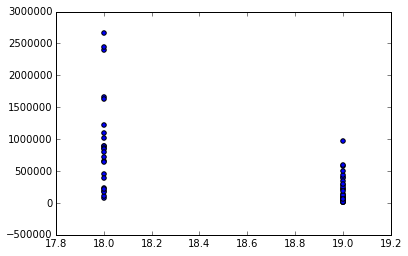

In [101]:
plt.scatter(sol_qual, it_count)


((array([-2.26751093, -1.90574552, -1.6934328 , -1.53794117, -1.41266963,
         -1.30632291, -1.21299259, -1.12917851, -1.05262603, -0.98179205,
         -0.91557053, -0.85313927, -0.79386855, -0.73726396, -0.68292896,
         -0.63053958, -0.57982669, -0.53056337, -0.48255566, -0.43563558,
         -0.38965586, -0.34448587, -0.30000832, -0.25611675, -0.21271332,
         -0.16970714, -0.1270127 , -0.08454864, -0.04223656,  0.        ,
          0.04223656,  0.08454864,  0.1270127 ,  0.16970714,  0.21271332,
          0.25611675,  0.30000832,  0.34448587,  0.38965586,  0.43563558,
          0.48255566,  0.53056337,  0.57982669,  0.63053958,  0.68292896,
          0.73726396,  0.79386855,  0.85313927,  0.91557053,  0.98179205,
          1.05262603,  1.12917851,  1.21299259,  1.30632291,  1.41266963,
          1.53794117,  1.6934328 ,  1.90574552,  2.26751093]),
  array([18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
         18, 18, 18, 18, 18, 18, 18, 19, 19, 1

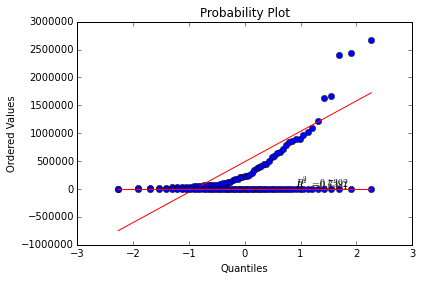